In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
tour_id = pd.read_excel('tourism_with_id.xlsx')
tour_rating = pd.read_csv('tourism_rating.csv')
user = pd.read_csv('user.csv')

In [4]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [5]:
tour_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [6]:
tour_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [7]:
tour_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [8]:
tour_id.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [9]:
tour_id.drop(columns=['Unnamed: 11','Unnamed: 12'],inplace=True)

In [10]:
user.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [15]:
user.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


In [11]:
tour_rating.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [14]:
tour_rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


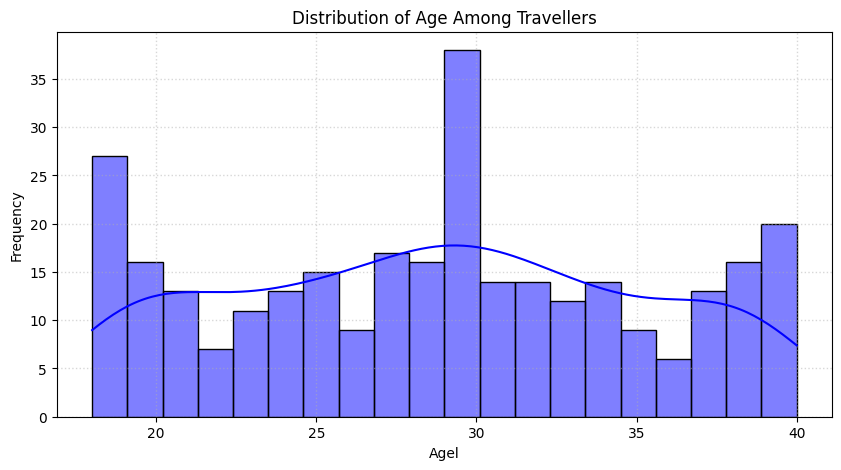

In [23]:
plt.figure(figsize=(10, 5))
ax =sns.histplot(user['Age'],bins=20,kde=True,color="b")
ax.grid(True, linestyle=':', linewidth=1, zorder=0, alpha=0.5)
plt.title("Distribution of Age Among Travellers")
plt.xlabel("Agel")
plt.ylabel("Frequency")
plt.show()

In [25]:
user['city'] = user.Location.apply(lambda x: x.split(",")[0])

In [30]:
vc = user.city.value_counts()
vc

city
Bekasi             39
Semarang           22
Yogyakarta         20
Lampung            20
Bogor              17
Jakarta Selatan    14
Subang             14
Cirebon            14
Depok              12
Ponorogo           11
Surabaya           10
Jakarta Utara      10
Jakarta Pusat      10
Sragen              9
Serang              9
Bandung             8
Tanggerang          8
Karawang            8
Kota Gede           8
Jakarta Barat       6
Jakarta Timur       6
Palembang           5
Solo                4
Klaten              4
Cilacap             4
Purwakarat          4
Nganjuk             2
Madura              2
Name: count, dtype: int64

C:\Users\jatin\AppData\Local\Temp\ipykernel_21736\2787734471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = "city", data = user, order = vc.index,palette="rocket")


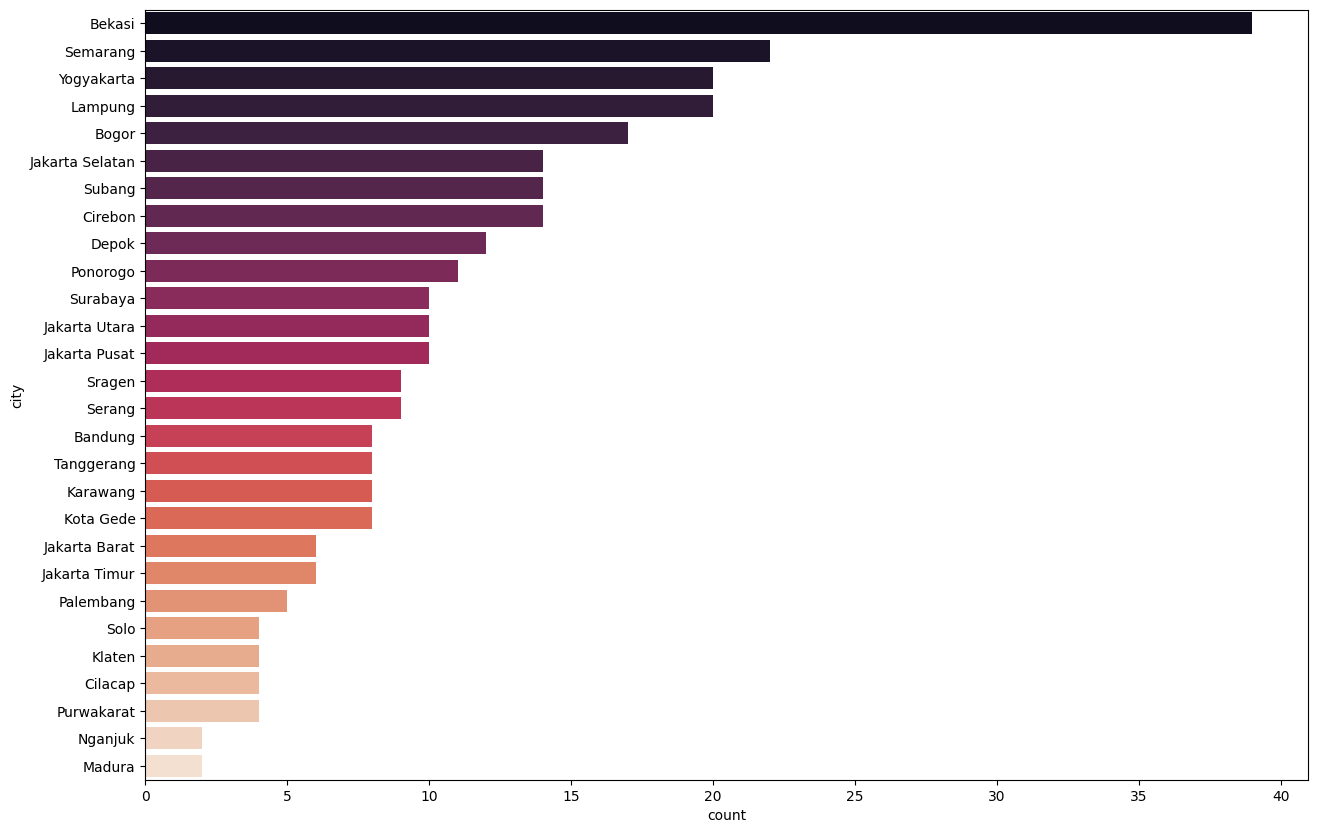

In [37]:
plt.figure(figsize = (15,10))
sns.countplot(y = "city", data = user, order = vc.index,palette="rocket")
plt.show()

In [39]:
tour_id['Category'].value_counts()

Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64

C:\Users\jatin\AppData\Local\Temp\ipykernel_21736\1473956103.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Category", y="Count", data=category_df, palette="rocket")
C:\Users\jatin\AppData\Local\Temp\ipykernel_21736\1473956103.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


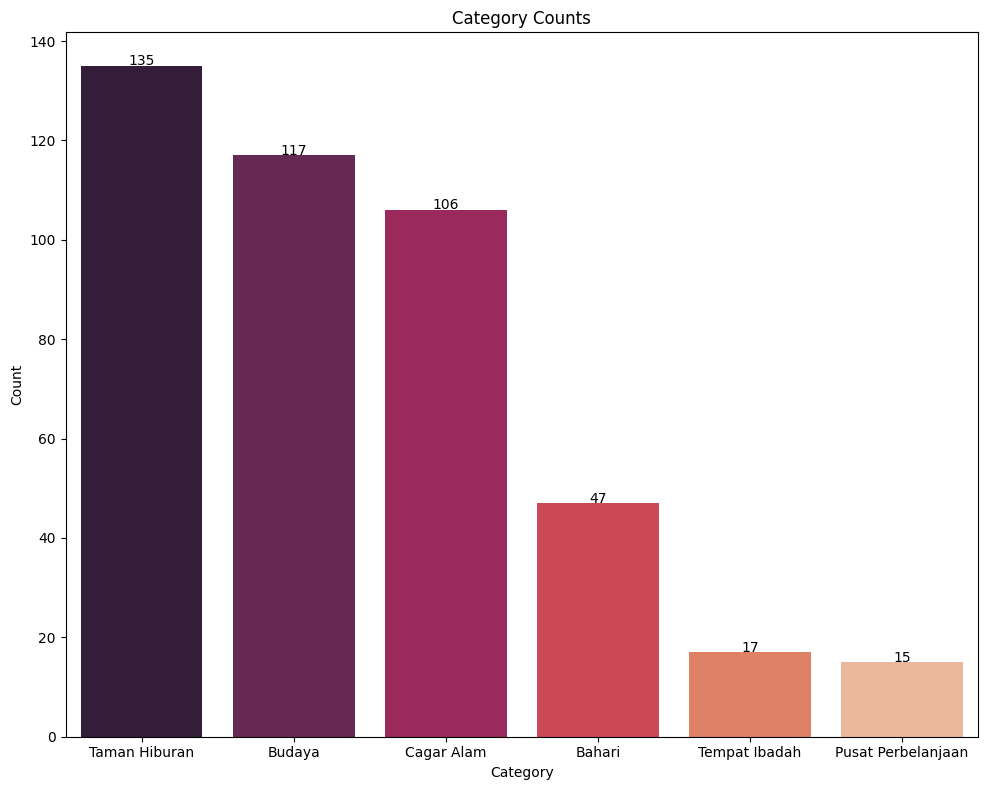

In [64]:
category_counts = tour_id['Category'].value_counts()
category_df = category_counts.reset_index()
category_df.columns = ["Category", "Count"]
plt.figure(figsize=(10,8)) 
ax = sns.barplot(x="Category", y="Count", data=category_df, palette="rocket")
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x=x, y=y + 0.1, s=f'{int(y)}', ha='center', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Category Counts")
plt.ylabel("Count")
plt.xlabel("Category")
plt.tight_layout()

plt.show()

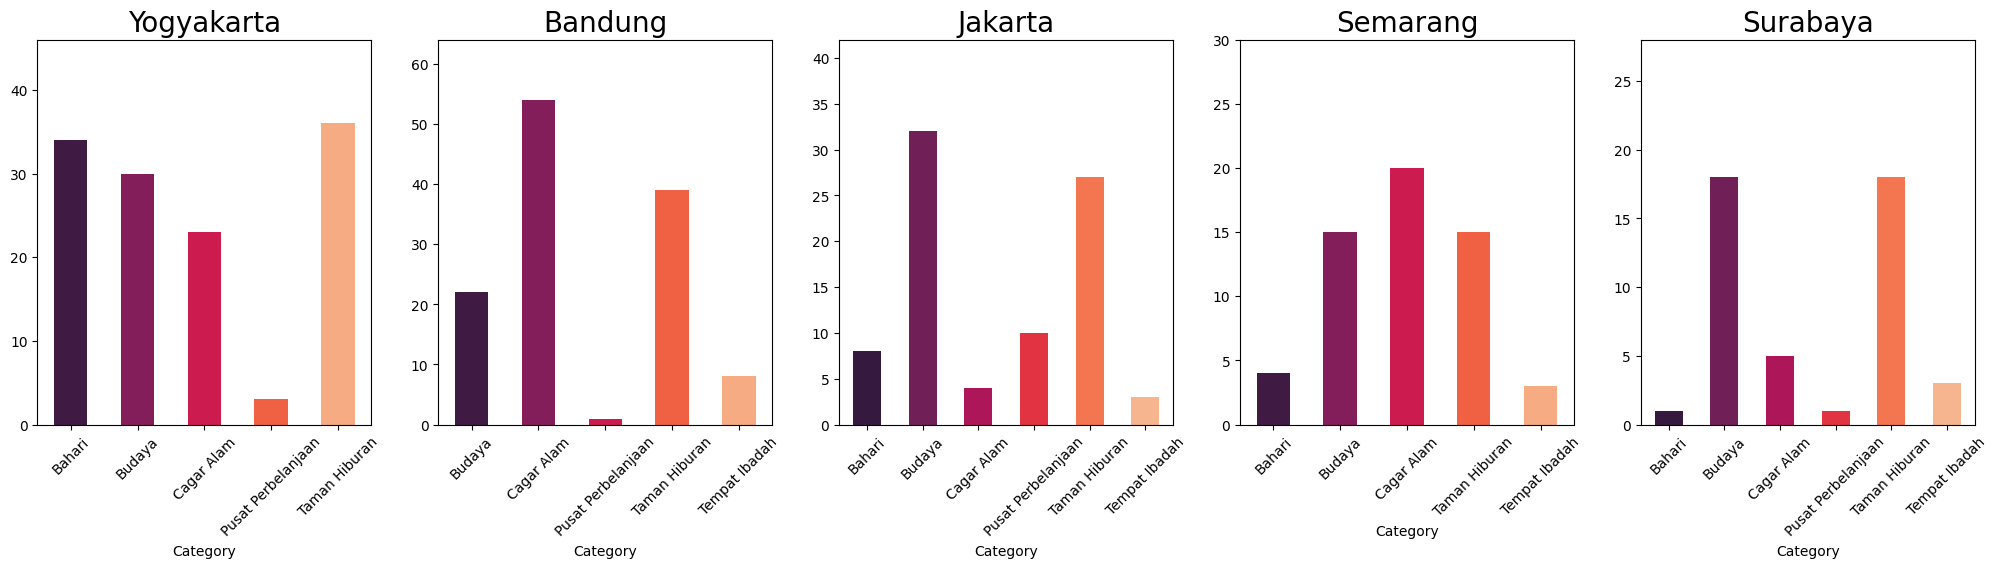

In [71]:
cities = tour_id.City.value_counts().index
num_cities = len(cities)

f, ax = plt.subplots(1, num_cities, figsize=(25, 5))  
for i, c in enumerate(cities):
    temp = tour_id[tour_id.City == c]
    vc = temp.Category.value_counts().sort_index()
    vc.plot.bar(ax=ax[i], color=sns.color_palette("rocket", len(vc)), stacked=True)
    ax[i].set_ylabel("")
    ax[i].set_ylim(0, vc.max() + 10)  
    ax[i].set_title(c, size=20)
    ax[i].set_xticklabels(labels=vc.index, rotation=45)
plt.show()

# Cagar alam is an Indonesian term that translates to "nature reserve"

In [77]:
tour_id.Category.value_counts()

Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64

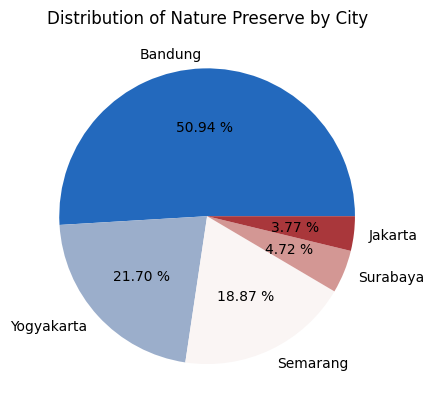

In [85]:
cagar_c=tour_id[tour_id.Category=="Cagar Alam"].City.value_counts()
cagar_c.plot.pie(radius=1.0, cmap="vlag", autopct="%1.2f %%")
plt.ylabel("")
plt.title("Distribution of Nature Preserve by City")  
plt.show()

In [92]:
ratings=tour_rating.groupby('Place_Id')[['Place_Ratings']].mean().round(2).reset_index()
ratings.head()

,Place_Id,Place_Ratings
0,1,3.72
1,2,2.84
2,3,2.53
3,4,2.86
4,5,3.52


In [93]:
place_ratings = pd.merge(tour_id,ratings, on = 'Place_Id', how = "left")
place_ratings.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Place_Ratings
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,3.72
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,2.84


In [94]:
place_ratings.sort_values("Place_Ratings",ascending = False)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Place_Ratings
415,416,Keraton Surabaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,NaN,"{'lat': -7.256755299999998, 'lng': 112.7942203}",-7.256755,112.794220,3.97
138,139,Puncak Gunung Api Purba - Nglanggeran,Gunung Nglanggeran adalah sebuah gunung di Dae...,Cagar Alam,Yogyakarta,10000,4.7,60.0,"{'lat': -7.841252999999998, 'lng': 110.543056}",-7.841253,110.543056,3.88
51,52,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,NaN,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798,3.84
253,254,Teras Cikapundung BBWS,Teras Cikapundung Bandung sebelumnya merupakan...,Taman Hiburan,Bandung,0,4.3,60.0,"{'lat': -6.8844199, 'lng': 107.6068344}",-6.884420,107.606834,3.79
321,322,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,0,4.2,NaN,"{'lat': -7.195110199999998, 'lng': 107.4312811}",-7.195110,107.431281,3.77
...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Museum Perangko,Museum perangko dibangun dengan bentuk banguna...,Budaya,Jakarta,5000,4.4,NaN,"{'lat': -6.304184100000001, 'lng': 106.9017725}",-6.304184,106.901773,2.24
233,234,Amazing Art World,"Amazing Art World Bandung, sebuah objek wisata...",Budaya,Bandung,75000,4.5,45.0,"{'lat': -6.8516591, 'lng': 107.5955534}",-6.851659,107.595553,2.22
208,209,Pantai Sanglen,Pantai Sanglen. Lokasinya berada di Desa Kemad...,Bahari,Yogyakarta,10000,4.5,NaN,"{'lat': -8.1367456, 'lng': 110.5716362}",-8.136746,110.571636,2.21
103,104,Tebing Breksi,Tebing Breksi merupakan tempat wisata yang ber...,Budaya,Yogyakarta,20000,4.4,NaN,"{'lat': -7.781571400000001, 'lng': 110.5045827}",-7.781571,110.504583,2.17


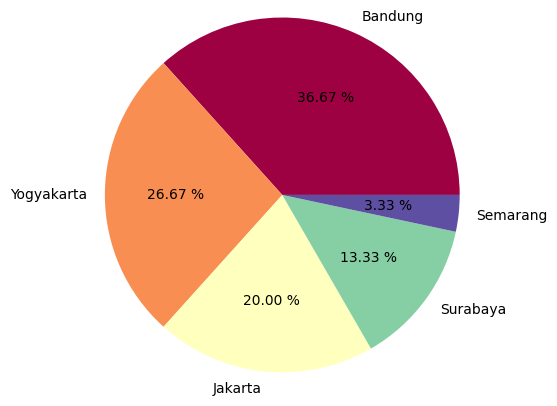

In [96]:
vc = place_ratings[place_ratings.Place_Ratings > 3.5].City.value_counts()
vc.plot.pie(radius = 1.2,cmap = "Spectral", autopct = "%1.2f %%")
plt.ylabel("")
plt.show()

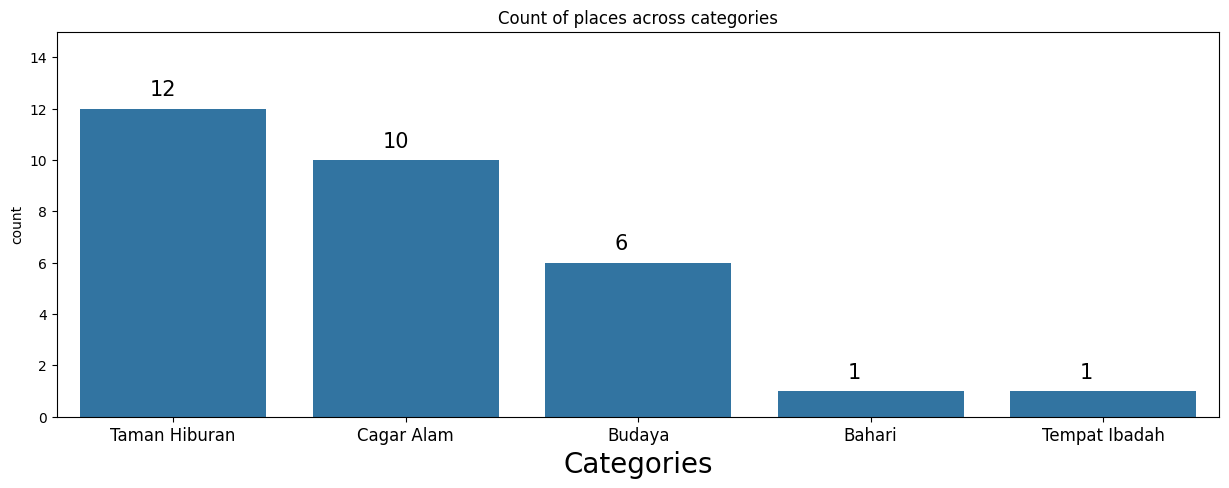

In [97]:
vc = place_ratings[place_ratings.Place_Ratings >3.5].Category.value_counts()
plt.figure(figsize = (15,5))
sns.countplot(x = "Category", data = place_ratings[place_ratings.Place_Ratings >3.5], order = vc.index)
i= 0
for idx in vc.index:
  plt.annotate(vc[idx], xy = (i-0.1, vc[idx]+0.5), size = 15)
  i += 1
plt.xlabel('Categories', size = 20)
plt.ylim(0, 15)
plt.xticks(size = 12)
plt.title("Count of places across categories")
plt.show()
plt.show()


# Model for tourists

In [101]:
recom_data = tour_rating.merge(tour_id[["Place_Id", "Place_Name", "City"]], on = "Place_Id", how = "left")
recom_data.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,City
0,1,179,3,Candi Ratu Boko,Yogyakarta
1,1,344,2,Pantai Marina,Semarang
2,1,5,5,Atlantis Water Adventure,Jakarta
3,1,373,3,Museum Kereta Ambarawa,Semarang
4,1,101,4,Kampung Wisata Sosro Menduran,Yogyakarta


In [103]:
ratings_data = recom_data.groupby(['User_Id', 'Place_Name'])['Place_Ratings'].mean().unstack()
ratings_data

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
User_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
297,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
data_norm = ratings_data.subtract(ratings_data.mean(axis=1), axis = 'rows')
data_norm.head()

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
User_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.166667,NaN,NaN,NaN,NaN,-1.166667,NaN,-0.166667
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.344828,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
user_similarity = data_norm.T.corr()
user_similarity.head()

User_Id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
User_Id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.981981,NaN,NaN,NaN,1.000000,-1.000000,0.188982,...,NaN,NaN,NaN,-0.192450,NaN,NaN,NaN,-1.000000,-0.379980,NaN
2,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-1.0,-0.188982,NaN,-1.000000,-1.0,-0.5,-0.164771,-1.000000,0.577350,NaN
3,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,1.000000,-0.654654,NaN,...,NaN,1.000000,NaN,-0.388889,-1.0,NaN,1.000000,1.000000,NaN,NaN
4,0.981981,NaN,NaN,1.000000,NaN,-9.819805e-01,0.333333,1.000000,-1.000000,NaN,...,-1.0,-1.000000,NaN,-1.000000,-1.0,1.0,-1.000000,NaN,0.944911,NaN
5,NaN,NaN,NaN,NaN,1.0,-5.551115e-17,NaN,0.191741,-1.000000,1.000000,...,1.0,NaN,-1.0,-0.320750,-1.0,NaN,NaN,0.760726,NaN,-1.0


In [108]:
user_similarity_cosine = cosine_similarity(data_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.03595249,  0.05315137, ..., -0.03342215,
        -0.07420851, -0.01770365],
       [ 0.03595249,  1.        , -0.04806466, ..., -0.01931211,
         0.08701855,  0.03947492],
       [ 0.05315137, -0.04806466,  1.        , ..., -0.02313585,
         0.01083189, -0.05956819],
       ...,
       [-0.03342215, -0.01931211, -0.02313585, ...,  1.        ,
         0.01781543,  0.01973164],
       [-0.07420851,  0.08701855,  0.01083189, ...,  0.01781543,
         1.        , -0.06031953],
       [-0.01770365,  0.03947492, -0.05956819, ...,  0.01973164,
        -0.06031953,  1.        ]])

In [109]:
picked_userid = 1
# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)
# Take a look at the data
user_similarity.head()

User_Id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
User_Id,,,,,,,,,,,,,,,,,,,,,
2,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,-1.0,-0.188982,NaN,-1.000000,-1.0,-0.5,-0.164771,-1.000000,0.577350,NaN
3,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,1.000000,-0.654654,NaN,...,NaN,1.000000,NaN,-0.388889,-1.0,NaN,1.000000,1.000000,NaN,NaN
4,0.981981,NaN,NaN,1.000000,NaN,-9.819805e-01,0.333333,1.000000,-1.000000,NaN,...,-1.0,-1.000000,NaN,-1.000000,-1.0,1.0,-1.000000,NaN,0.944911,NaN
5,NaN,NaN,NaN,NaN,1.000000e+00,-5.551115e-17,NaN,0.191741,-1.000000,1.0,...,1.0,NaN,-1.0,-0.320750,-1.0,NaN,NaN,0.760726,NaN,-1.0
6,NaN,NaN,NaN,-0.981981,-5.551115e-17,1.000000e+00,0.000000,-1.000000,NaN,NaN,...,0.5,0.987829,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [110]:
n = 10
# User similarity threashold
user_similarity_threshold = 0.3
# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]
# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 1 are User_Id
286    1.0
124    1.0
126    1.0
136    1.0
138    1.0
8      1.0
90     1.0
89     1.0
86     1.0
155    1.0
Name: 1, dtype: float64


In [111]:
picked_userid_rated = data_norm[data_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_rated.T

User_Id,1
Place_Name,
Atlantis Water Adventure,1.586207
Candi Ratu Boko,-0.413793
Curug Anom,-0.413793
Curug Tilu Leuwi Opat,0.586207
De Mata Museum Jogja,-0.413793
Grand Maerakaca,0.586207
Gua Pawon,-1.413793
Kampung Wisata Sosro Menduran,0.586207
Margasatwa Muara Angke,0.586207


In [113]:
similar_user_places = data_norm[data_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_places

Place_Name,Air Mancur Menari,Air Terjun Sri Gethuk,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Atlantis Land Surabaya,Babakan Siliwangi City Forest Path Bandung,Bandros City Tour,Bangsal Pagelaran,Batununggal Indah Club,...,Watu Mabur Mangunan,Wisata Alam Kalibiru,Wisata Alam Mangrove Angke,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Mangrove Tapak
User_Id,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.991453,NaN,NaN,NaN
89,NaN,-0.942308,NaN,NaN,NaN,0.057692,NaN,NaN,NaN,NaN,...,NaN,NaN,0.057692,-0.942308,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.396552,NaN
124,NaN,NaN,NaN,-1.958333,NaN,NaN,NaN,-0.958333,NaN,1.041667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.958333,NaN,NaN
126,NaN,NaN,NaN,NaN,1.815789,NaN,NaN,NaN,1.815789,NaN,...,NaN,NaN,NaN,NaN,NaN,1.815789,NaN,-2.184211,NaN,1.815789
136,NaN,NaN,NaN,NaN,NaN,NaN,-0.581081,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.418919,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,1.906250,NaN,NaN,NaN,NaN,0.906250,NaN,...,NaN,NaN,NaN,1.906250,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.703704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# Remove the places already visitied
similar_user_places.drop(picked_userid_rated.columns,axis=1, inplace=True, errors='ignore')
# Take a look at the data
similar_user_places

Place_Name,Air Mancur Menari,Air Terjun Sri Gethuk,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Atlantis Land Surabaya,Babakan Siliwangi City Forest Path Bandung,Bandros City Tour,Bangsal Pagelaran,Batununggal Indah Club,...,Watu Mabur Mangunan,Wisata Alam Kalibiru,Wisata Alam Mangrove Angke,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Mangrove Tapak
User_Id,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.991453,NaN,NaN,NaN
89,NaN,-0.942308,NaN,NaN,NaN,0.057692,NaN,NaN,NaN,NaN,...,NaN,NaN,0.057692,-0.942308,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.396552,NaN
124,NaN,NaN,NaN,-1.958333,NaN,NaN,NaN,-0.958333,NaN,1.041667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.958333,NaN,NaN
126,NaN,NaN,NaN,NaN,1.815789,NaN,NaN,NaN,1.815789,NaN,...,NaN,NaN,NaN,NaN,NaN,1.815789,NaN,-2.184211,NaN,1.815789
136,NaN,NaN,NaN,NaN,NaN,NaN,-0.581081,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.418919,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,1.906250,NaN,NaN,NaN,NaN,0.906250,NaN,...,NaN,NaN,NaN,1.906250,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.703704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# A dictionary to store item scores
item_score = {}
# Loop through items
for i in similar_user_places.columns:
  
  # Get the ratings for movie i
  place_rating = similar_user_places[i]
  
  # Create a variable to store the score
  total = 0
  
  # Create a variable to store the number of scores
  count = 0
  
  # Loop through similar users
  for u in similar_users.index:
    # If the place has rating
    if pd.isna(place_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the place rating
      score = similar_users[u] * place_rating[u]
      # Add the score to the total score for the place so far
      total += score
      # Add 1 to the count
      count +=1
  
  # Get the average score for the item
  item_score[i] = total / count


# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['place', 'place_score'])
    
# Sort the places by score
ranked_item_score = item_score.sort_values(by='place_score', ascending=False)

# Select top m places
m = 10
ranked_item_score.place.tolist()[:10]

['Tektona Waterpark',
 'Masjid Nasional Al-Akbar',
 'Kebun Tanaman Obat Sari Alam',
 'Museum Fatahillah',
 'Glamping Lakeside Rancabali',
 'Rainbow Garden',
 'Upside Down World Bandung',
 'Pelabuhan Marina',
 'Ciputra Waterpark',
 'Kawasan Malioboro']